In [287]:
import cv2

image = cv2.imread('20213112.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

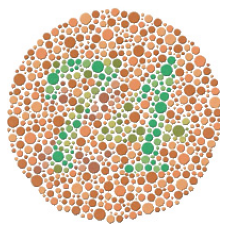

In [288]:
image = image[45:250,50:250]
plt.imshow(image)
plt.axis(False);

In [289]:
mean_ = image.mean()

new_image = []
for row in image :
    for channel in row :
        if np.max(channel) >= mean_ :
            channel = [255, 255, 255]
        else :
            channel = [0, 0, 0]
        new_image.append(channel)
new_image = np.array(new_image).reshape(image.shape)

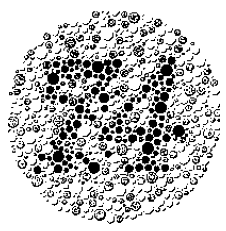

In [290]:
plt.imshow(new_image)
plt.axis('off');

In [291]:
new_image.shape

(205, 200, 3)

In [292]:
max_pool = keras.layers.MaxPool2D(pool_size=(2,2), padding='same')(new_image.reshape(1,205,200,3))


In [293]:
b,h,w,c = max_pool.shape
b, h, w, c

(1, 103, 100, 3)

In [294]:
image = max_pool.numpy().reshape(103,100,3)

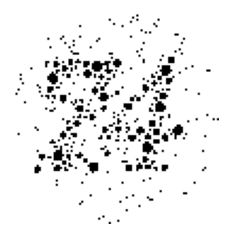

In [295]:
plt.imshow(image)
plt.axis('off');

In [296]:
image = image.astype(np.uint8)
image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
image.shape

(103, 100)

In [326]:
def ishihara_to_gray(image_path, plot=True, figsize=(10,4)):
    '''
    turn ishihar image (RGB 3D) to (Gray 2D)
    '''

    image_ = cv2.imread(image_path)
    image_ = cv2.cvtColor(image_, cv2.COLOR_BGR2RGB)
    h,w,c = image_.shape

    # contrast some color
    mean_ = image_.mean()
    new_image = []
    for row in image_ :
        for channel in row :
            if np.max(channel) >= mean_ :
                channel = [255, 255, 255]
            else :
                channel = [0, 0, 0]
            new_image.append(channel)
    new_image = np.array(new_image).reshape(image_.shape)

    # reduce some noise
    max_pool = keras.layers.MaxPool2D(pool_size=(2,2), padding='same')(new_image.reshape(1,h,w,c))
    b,h,w,c = max_pool.shape
    image = max_pool.numpy().reshape(h,w,c)

    # 3D to 2D
    image = new_image.astype(np.uint8)
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)


    if plot :
        plt.figure(figsize=figsize)
        plt.subplot(121)
        plt.title('Original Image')
        plt.imshow(image_)
        plt.axis('off')

        plt.subplot(122)
        plt.title('Gray Image')
        plt.imshow(image, cmap='gray')
        plt.axis('off')
        
        return image

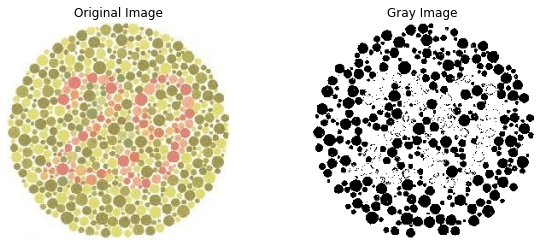

In [327]:
image = ishihara_to_gray('ishi2.png')

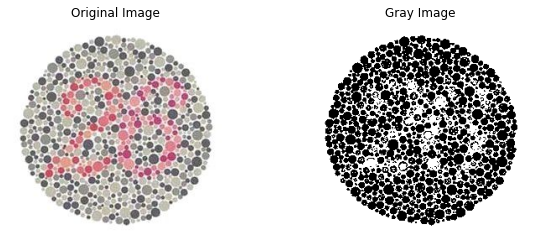

In [328]:
image = ishihara_to_gray('ishi_2.jpg')

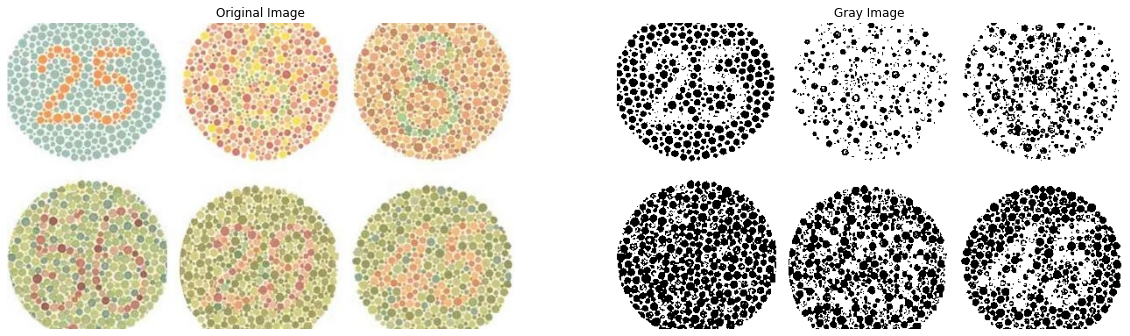

In [329]:
image = ishihara_to_gray('ishi_3.jpg', figsize=(20,10))